<a href="https://colab.research.google.com/github/salmazayaf/Latihan-Kompstat/blob/main/Latihan_2_Kompstat_Salma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Latihan 2 Komputasi Statistika

# GMM-EM

**Dataset Preparation**

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import numpy as np

In [2]:
url= 'https://raw.githubusercontent.com/argyadiva/Assignment1-Gaussian-Mixture-Model/main/Iris.csv'
df= pd.read_csv(url)
df0=df.copy
df = df.drop('Species', axis=1)
df = df.drop('Id', axis=1)
df2=df.copy()
df= df.drop('PetalWidthCm', axis=1)
df= df.drop('PetalLengthCm', axis=1)
df2=df2.drop('SepalWidthCm', axis=1)
df2=df2.drop('SepalLengthCm', axis=1)
print(df.head())
print(df2.head())

   SepalLengthCm  SepalWidthCm
0            5.1           3.5
1            4.9           3.0
2            4.7           3.2
3            4.6           3.1
4            5.0           3.6
   PetalLengthCm  PetalWidthCm
0            1.4           0.2
1            1.4           0.2
2            1.3           0.2
3            1.5           0.2
4            1.4           0.2


**K-Means Sepal Length vs Sepal Width**

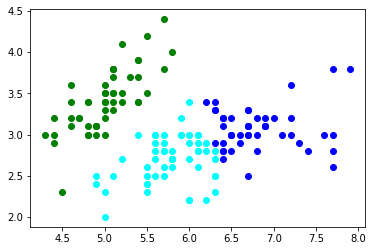

In [3]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(df)

pred=kmeans.predict(df)
frame=pd.DataFrame(df)
frame['cluster']=pred
frame.columns=['SepalLengthCm', 'SepalWidthCm', 'cluster']

color=['blue', 'green', 'cyan', 'black']
for k in range (0,3):
  df_1=frame[frame['cluster']==k]
  plt.scatter(df_1['SepalLengthCm'],df_1['SepalWidthCm'], c=color[k])
plt.show()

**K-Means Petal Length vs Petal Width**

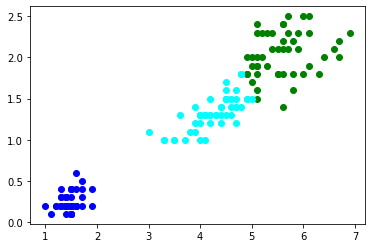

In [4]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(df2)

pred=kmeans.predict(df2)
frame=pd.DataFrame(df2)
frame['cluster']=pred
frame.columns=['PetalLengthCm', 'PetalWidthCm', 'cluster']

color=['blue', 'green', 'cyan', 'black']
for k in range (0,3):
  df2_1=frame[frame['cluster']==k]
  plt.scatter(df2_1['PetalLengthCm'],df2_1['PetalWidthCm'], c=color[k])
plt.show()

**Gaussian Mixture Model Sepal Length vs Sepal Width**

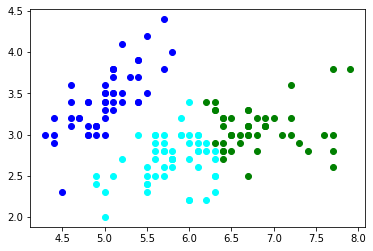

In [5]:
gmm=GaussianMixture(n_components=3)
gmm.fit(df)

labels=gmm.predict(df)
frame = pd.DataFrame(df)
frame['cluster']=labels
frame.columns=['SepalLengthCm', 'SepalWidthCm', 'cluster']

color=['blue', 'green', 'cyan', 'black']
for k in range (0,3):
  df_2=frame[frame['cluster']==k]
  plt.scatter(df_2['SepalLengthCm'],df_2['SepalWidthCm'], c=color[k])
plt.show()

**Gaussian Mixture Model Petal Length vs Petal Width**

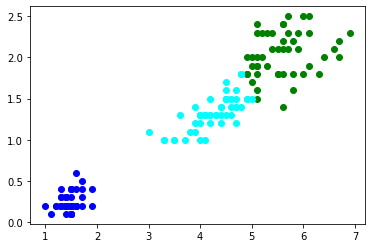

In [6]:
gmm=GaussianMixture(n_components=3)
gmm.fit(df2)

labels=gmm.predict(df2)
frame = pd.DataFrame(df2)
frame['cluster']=labels
frame.columns=['PetalLengthCm', 'PetalWidthCm', 'cluster']

color=['blue', 'green', 'cyan', 'black']
for k in range (0,3):
  df2_2=frame[frame['cluster']==k]
  plt.scatter(df2_2['PetalLengthCm'],df2_2['PetalWidthCm'], c=color[k])
plt.show()

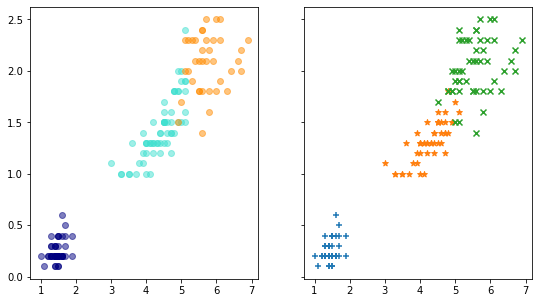

In [7]:
from matplotlib.patches import Ellipse
from sklearn import datasets, cluster
def plot_cov_ellipse(cov, pos, col='b', nstd=2, ax=None, **kwargs):
  def eigsorted(cov):
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    return vals[order], vecs[:,order]
  if ax is None:
    ax = plt.gca()
  vals, vecs = eigsorted(cov)
  theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
  # Width and height are "full" widths, not radius
  width, height = 2 * nstd * np.sqrt(vals)
  ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, color=col, alpha=0.2,**kwargs)
  ax.add_artist(ellip)
  return ellip

colors = ['navy', 'turquoise', 'darkorange']
markers = ['+','*','x']

#load iris data; pairwise plots
iris = datasets.load_iris()
df=pd.DataFrame(iris.data,columns = iris.feature_names)

kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(df)
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(9,5))
for n in range(kmeans.n_clusters):
  data_kmeanslabels = iris.data[kmeans.labels_ == n]
  ax1.scatter(data_kmeanslabels[:, 2], data_kmeanslabels[:, 3], color=colors[n], alpha=0.5)
  data_truelabels = iris.data[iris.target == n]
  ax2.scatter(data_truelabels[:, 2], data_truelabels[:, 3], marker=markers[n])
plt.show()

**Gaussian Mixture Model dengan Expectation Maximization Petal Length vs Petal Width**

In [8]:
# Try GMMs using different types of covariances in 2d: petal length vs petal width
estimators = dict((cov_type, GaussianMixture(n_components=3,
                   covariance_type=cov_type, max_iter=20, random_state=0))
                  for cov_type in ['spherical', 'diag', 'tied', 'full'])
for (name,estimator) in estimators.items():
  estimator.fit(iris.data[:,2:4]) ## fits a mixture model using EM

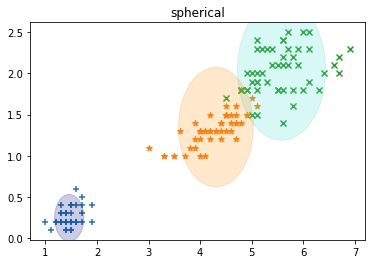

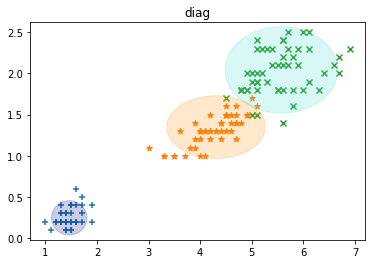

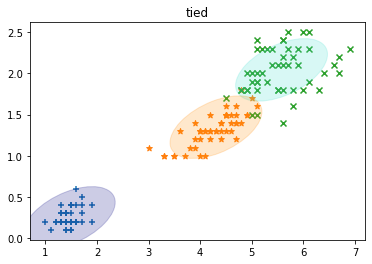

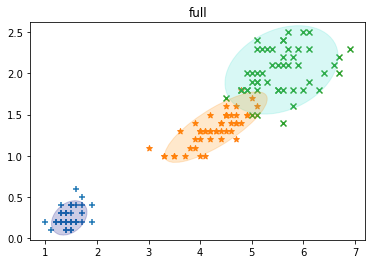

In [9]:
# Contoh Code Visualisasi GMM dengan EM dan tipe covariansi yang berbeda
for (name,gmm) in estimators.items():
  for n, color in enumerate(colors):
    data = iris.data[iris.target == n]
    plt.scatter(data[:, 2], data[:, 3], marker=markers[n])
    if gmm.covariance_type == 'full':
      cov = gmm.covariances_[n]
    elif gmm.covariance_type == 'tied':
      cov = gmm.covariances_
    elif gmm.covariance_type == 'diag':
      cov = np.diag(gmm.covariances_[n])
    elif gmm.covariance_type == 'spherical':
      cov = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
    #print(cov)
    pos = estimator.means_[n]
    #print(pos)
    plot_cov_ellipse(cov,pos,col=color)
  plt.title(name)
  plt.show()

**Gaussian Mixture Model dengan Expectation Maximization Sepal Length vs Sepal Width**

In [10]:
# Try GMMs using different types of covariances in 2d: sepal length vs sepal width
estimators = dict((cov_type, GaussianMixture(n_components=3,
                   covariance_type=cov_type, max_iter=20, random_state=0))
                  for cov_type in ['spherical', 'diag', 'tied', 'full'])
for (name,estimator) in estimators.items():
    estimator.fit(iris.data[:,0:2]) ## fits mixture model menggunakan EM

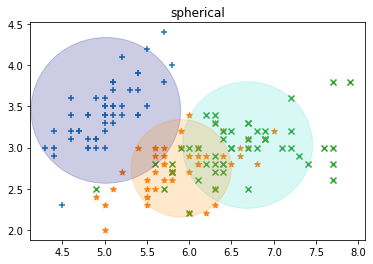

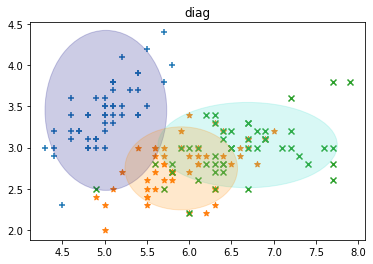

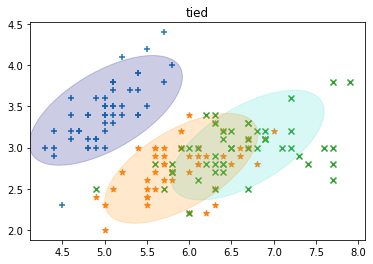

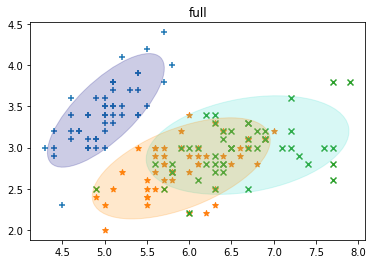

In [11]:
for (name,gmm) in estimators.items():
    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 0], data[:, 1], marker=markers[n])
        if gmm.covariance_type == 'full':
            cov = gmm.covariances_[n]
        elif gmm.covariance_type == 'tied':
            cov = gmm.covariances_
        elif gmm.covariance_type == 'diag':
            cov = np.diag(gmm.covariances_[n])
        elif gmm.covariance_type == 'spherical':
            cov = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        #print(cov)
        pos = estimator.means_[n]
        #print(pos)
        plot_cov_ellipse(cov,pos,col=color)
    plt.title(name)
    plt.show()

**Kesimpulan**

Clustering terbaik apabila data visualisasinya berbentuk sirkular. Sehingga dapat disimpulkan bahwa, untuk petal length vs petal width dan sepal length vs sepal width, model clustering GMM lebih baik dibanding K Means dan GMM with EM lebih baik dibanding GMM